In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from string import punctuation
from jcopml.plot import plot_missing_value

sw_eng = stopwords.words('english') 
import string

import seaborn as sns

# 2. Import Dataset

In [4]:
df = pd.read_csv('abcnews-date-text.csv', index_col='publish_date')
df.head()

C:\Users\Malik Afu Hamid\anaconda3\lib\site-packages\numpy\lib\arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,headline_text
publish_date,
20030219,aba decides against community broadcasting lic...
20030219,act fire witnesses must be aware of defamation
20030219,a g calls for infrastructure protection summit
20030219,air nz staff in aust strike for pay rise
20030219,air nz strike to affect australian travellers


# 3. Exploratory Data Analysis (EDA)

### Data Information

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1103663 entries, 20030219 to 20171231
Data columns (total 1 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   headline_text  1103663 non-null  object
dtypes: object(1)
memory usage: 16.8+ MB


In [4]:
df.shape

(1103663, 1)

### Data Description

In [5]:
df.describe()

,headline_text
count,1103663
unique,1076219
top,abc sport
freq,755


### Check Missing Value

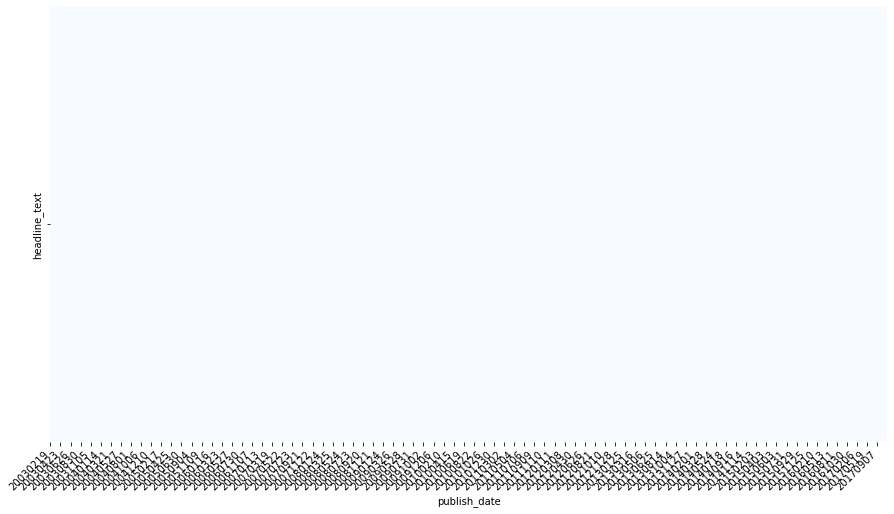

In [6]:
plot_missing_value(df)

### Count a Character in Text Message

In [7]:
df['Character'] = df['headline_text'].apply(len)
df.head()

,headline_text,Character
publish_date,,
20030219,aba decides against community broadcasting lic...,50
20030219,act fire witnesses must be aware of defamation,46
20030219,a g calls for infrastructure protection summit,46
20030219,air nz staff in aust strike for pay rise,40
20030219,air nz strike to affect australian travellers,45


<AxesSubplot:ylabel='Frequency'>

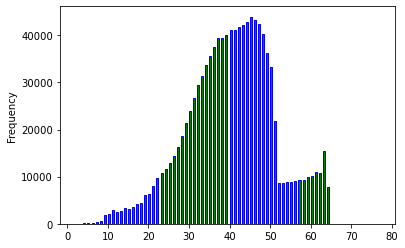

In [8]:
# Visualize a length of Character in text message

df['Character'].plot.hist(bins = 150, edgecolor='b',color='green')

In [9]:
df.Character.describe()

count    1.103663e+06
mean     4.018404e+01
std      1.072888e+01
min      2.000000e+00
25%      3.300000e+01
50%      4.100000e+01
75%      4.700000e+01
max      7.700000e+01
Name: Character, dtype: float64

In [10]:
#grab the topic that has a maximum character

df[df['Character'] == 77]['headline_text'].iloc[0]

"icac hears phone tap outlining sydney mayor's plan to crucify general manager"

### Visualize Label Distribution

array([[<AxesSubplot:title={'center':'Character'}>]], dtype=object)

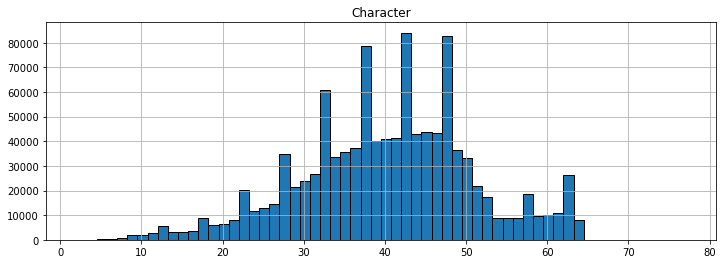

In [11]:
df.hist(column='Character', bins =60, figsize=(12,4), edgecolor='black')

In [12]:
df.head()

,headline_text,Character
publish_date,,
20030219,aba decides against community broadcasting lic...,50
20030219,act fire witnesses must be aware of defamation,46
20030219,a g calls for infrastructure protection summit,46
20030219,air nz staff in aust strike for pay rise,40
20030219,air nz strike to affect australian travellers,45


In [13]:
df.headline_text

publish_date
20030219    aba decides against community broadcasting lic...
20030219       act fire witnesses must be aware of defamation
20030219       a g calls for infrastructure protection summit
20030219             air nz staff in aust strike for pay rise
20030219        air nz strike to affect australian travellers
                                  ...                        
20171231    the ashes smiths warners near miss liven up bo...
20171231              timelapse: brisbanes new year fireworks
20171231             what 2017 meant to the kids of australia
20171231     what the papodopoulos meeting may mean for ausus
20171231    who is george papadopoulos the former trump ca...
Name: headline_text, Length: 1103663, dtype: object

In [14]:
def clean_data(text):
    clean_word = word_tokenize(text)
    clean_word = [word for word in clean_word if word not in punctuation]
    clean_word = [word for word in clean_word if word.lower() not in sw_eng]
    clean_word = ' '.join(clean_word)
    return clean_word

In [15]:
df.headline_text = df.headline_text.apply(clean_data)
df.headline_text

publish_date
20030219           aba decides community broadcasting licence
20030219             act fire witnesses must aware defamation
20030219             g calls infrastructure protection summit
20030219                    air nz staff aust strike pay rise
20030219           air nz strike affect australian travellers
                                  ...                        
20171231    ashes smiths warners near miss liven boxing da...
20171231               timelapse brisbanes new year fireworks
20171231                            2017 meant kids australia
20171231                  papodopoulos meeting may mean ausus
20171231       george papadopoulos former trump campaign aide
Name: headline_text, Length: 1103663, dtype: object

# 4. Extract BoW with CountVectorizer

In [16]:
from sklearn.feature_extraction.text import CountVectorizer

In [17]:
bow = CountVectorizer(tokenizer=word_tokenize, stop_words= sw_eng)
bow_matrix = bow.fit_transform(df.headline_text)

C:\Users\Malik Afu Hamid\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:382: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'re", "'s", "'ve", 'could', 'might', 'must', "n't", 'need', 'sha', 'wo', 'would'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


In [18]:
vocab = bow.get_feature_names()

In [19]:
vocab

["'400",
 "'abandoned",
 "'abbott",
 "'abducted",
 "'abnormality",
 "'abolitionists",
 "'abomindable",
 "'absolutely",
 "'absurd",
 "'abused",
 "'accelerated",
 "'accept",
 "'accidentally",
 "'actual",
 "'adhd",
 "'admit",
 "'advanced",
 "'afraid",
 "'aggravated",
 "'aggression",
 "'aggressive",
 "'agitated",
 "'agreed",
 "'agriculture",
 "'ahead",
 "'air",
 "'aladdins",
 "'alan",
 "'alarm",
 "'alarmed",
 "'alarming",
 "'aleppo",
 "'alive",
 "'all",
 "'allah",
 "'allegiance",
 "'almost",
 "'altercation",
 "'amarda",
 "'amazing",
 "'ambitious",
 "'ambulance",
 "'among",
 "'an",
 "'angel",
 "'angry",
 "'another",
 "'anti",
 "'anybody",
 "'anytime",
 "'apologise",
 "'appalled",
 "'appalling",
 "'appreciates",
 "'appropriate",
 "'approvable",
 "'approved",
 "'april",
 "'arab",
 "'are",
 "'arm",
 "'armed",
 "'arrest",
 "'arrived",
 "'arrogance",
 "'artificial",
 "'artist",
 "'ashamed",
 "'ashes",
 "'asian",
 "'assiduously",
 "'assistance",
 "'assumed",
 "'assyrian",
 "'astounded",
 "'astoun

# 5. Latent Semantic Analysis (LSA)

In [20]:
from sklearn.decomposition import TruncatedSVD

In [21]:
lsa = TruncatedSVD(n_components=10, n_iter=10, random_state= 42)
lsa_matrix = lsa.fit_transform(bow_matrix)

### LSA Matrix

In [22]:
list(lsa_matrix)

[array([ 0.00811391,  0.0101068 , -0.00072522,  0.01922694, -0.0173475 ,
        -0.00631012,  0.00055412,  0.01114774,  0.00181918,  0.0107974 ]),
 array([ 0.06631447,  0.04105766,  0.01082683,  0.12039451, -0.1425436 ,
        -0.02854462, -0.04419831, -0.01976005,  0.08899215,  0.56472018]),
 array([ 0.01743392,  0.02496522, -0.00445817,  0.05385676, -0.0534441 ,
        -0.00386444, -0.00223605,  0.01111479,  0.00592464,  0.02928028]),
 array([ 0.03417322,  0.04333208, -0.00194914,  0.10024125, -0.068606  ,
         0.03468241, -0.00960204,  0.0397893 ,  0.00901657,  0.0489039 ]),
 array([ 0.02668068,  0.03714012,  0.00853411,  0.07175183, -0.03500886,
         0.07447361, -0.0132713 ,  0.00905421,  0.01685717,  0.09103009]),
 array([ 0.00797623,  0.01083327,  0.00508044,  0.01831216, -0.01596203,
         0.01829977,  0.00316804,  0.00693456,  0.0084297 ,  0.03250366]),
 array([ 5.95869810e-03,  1.38705620e-02,  2.79208192e-04,  1.31609429e-02,
        -6.81930437e-03,  7.83798991

### LSA Components

In [23]:
list(lsa.components_)

[array([5.33951148e-07, 1.11970951e-08, 4.55949893e-07, ...,
        6.13468031e-08, 5.31651447e-07, 1.83117653e-07]),
 array([1.66472092e-06, 3.28400425e-08, 8.10371355e-07, ...,
        1.67826814e-07, 1.83109985e-06, 3.84599533e-07]),
 array([-1.14065824e-07, -1.27006562e-09,  8.45548914e-08, ...,
        -2.72123924e-08, -1.11332827e-08, -3.62955924e-10]),
 array([3.92997905e-06, 9.78043150e-08, 2.74720754e-06, ...,
        4.13339571e-07, 4.65690762e-06, 1.18128690e-06]),
 array([-1.62570082e-06,  1.68711628e-08, -1.16179966e-06, ...,
        -3.79485388e-07, -1.17625180e-06, -8.19236912e-07]),
 array([ 3.27963004e-06,  6.32690128e-08, -5.96199432e-07, ...,
        -1.66575428e-07,  4.17437245e-06, -8.57984315e-08]),
 array([-1.18798871e-06,  2.41389190e-09,  5.75887015e-09, ...,
        -7.38845951e-08, -2.57018194e-07,  1.51171841e-07]),
 array([ 2.66367532e-07,  1.41974431e-08,  1.60055232e-06, ...,
        -1.35254035e-07,  1.81950617e-06,  7.29240161e-07]),
 array([6.33389667

In [24]:
print(bow_matrix.shape) 
print(lsa_matrix.shape)
print(lsa.components_.shape)

(1103663, 98656)
(1103663, 10)
(10, 98656)


In [25]:
def get_topic(model):
    return [[vocab[idx] for idx in reversed (comp.argsort()[-5:]) if vocab[idx].isalnum()]
            for comp in model.components_]

In [26]:
get_topic(lsa)

[['police', 'man', 'new', 'court', 'charged'],
 ['new', 'says', 'man', 'govt', 'council'],
 ['man', 'court', 'charged', 'murder', 'accused'],
 ['says', 'govt', 'us', 'council', 'plan'],
 ['says', 'new', 'man', 'police', 'charged'],
 ['us', 'court', 'iraq', 'australia', 'killed'],
 ['court', 'accused', 'face', 'murder', 'told'],
 ['council', 'plan', 'water', 'coast', 'rise'],
 ['interview', 'fire', 'extended', 'australia', 'nsw'],
 ['fire', 'australia', 'nsw', 'crash', 'day']]